Epoch 1/20
11/11 [==============================] - 11s 6ms/step - loss: 6519.9839
Epoch 2/20
11/11 [==============================] - 0s 5ms/step - loss: 2721.8418
Epoch 3/20
11/11 [==============================] - 0s 5ms/step - loss: 808.9898
Epoch 4/20
11/11 [==============================] - 0s 6ms/step - loss: 185.0341
Epoch 5/20
11/11 [==============================] - 0s 6ms/step - loss: 105.6578
Epoch 6/20
11/11 [==============================] - 0s 5ms/step - loss: 116.2326
Epoch 7/20
11/11 [==============================] - 0s 5ms/step - loss: 107.6294
Epoch 8/20
11/11 [==============================] - 0s 6ms/step - loss: 97.9360
Epoch 9/20
11/11 [==============================] - 0s 5ms/step - loss: 95.4694
Epoch 10/20
11/11 [==============================] - 0s 5ms/step - loss: 92.5345
Epoch 11/20
11/11 [==============================] - 0s 5ms/step - loss: 89.9942
Epoch 12/20
11/11 [==============================] - 0s 5ms/step - loss: 87.6180
Epoch 13/20
11/11 [========

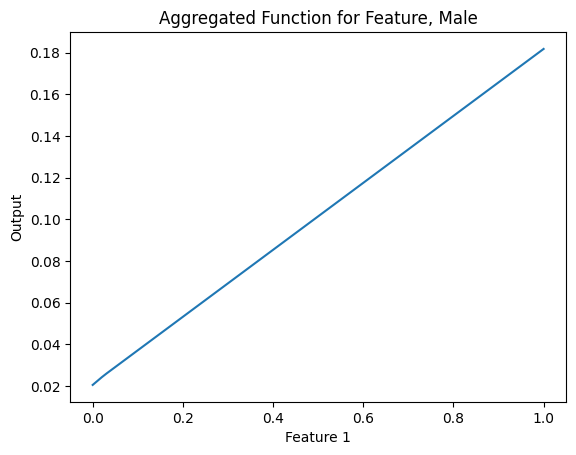

4/4 [==============================] - 0s 4ms/step


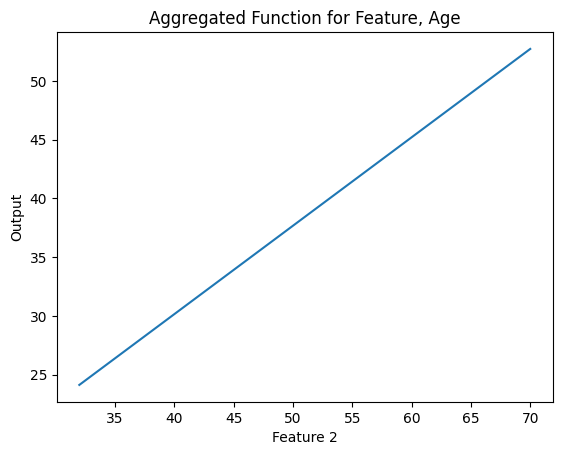

4/4 [==============================] - 0s 3ms/step


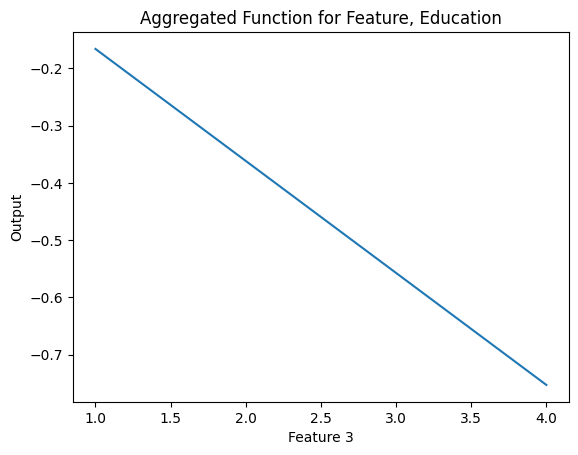

4/4 [==============================] - 0s 5ms/step


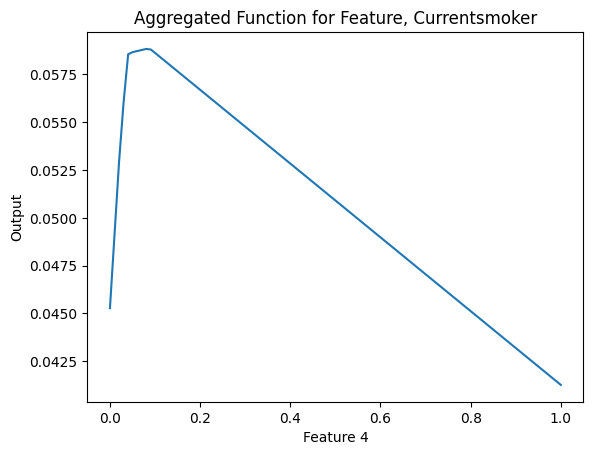

4/4 [==============================] - 0s 3ms/step


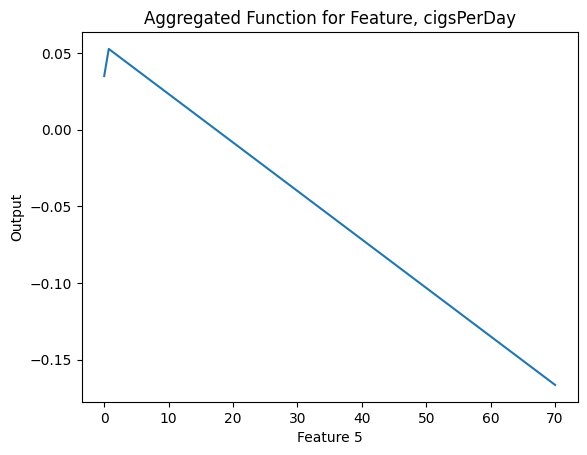

4/4 [==============================] - 0s 4ms/step


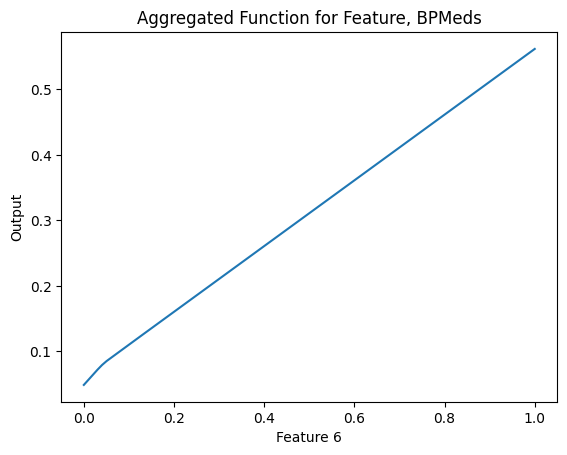

4/4 [==============================] - 0s 4ms/step


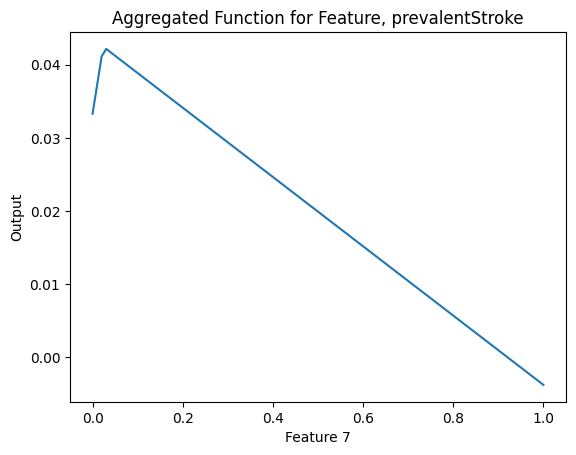

4/4 [==============================] - 0s 3ms/step


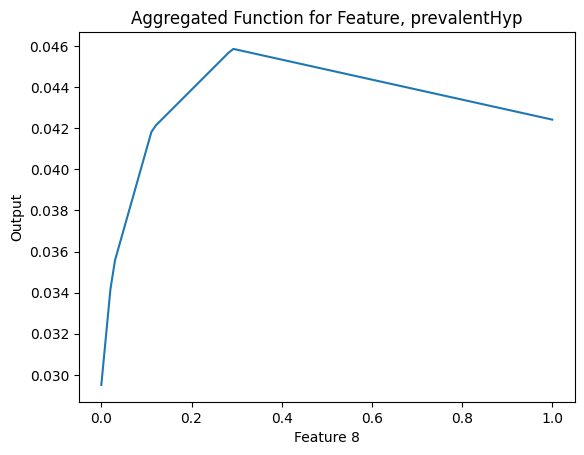

4/4 [==============================] - 0s 4ms/step


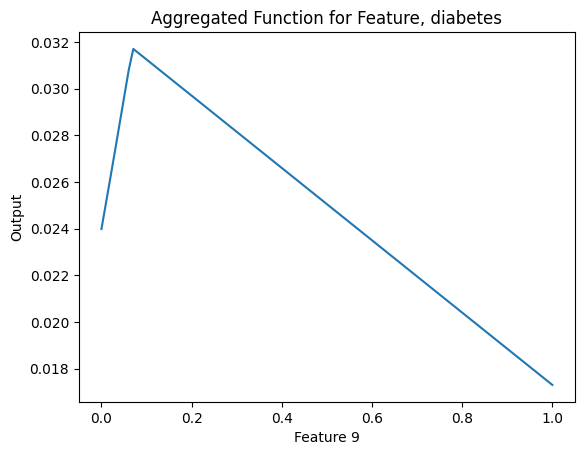

4/4 [==============================] - 0s 4ms/step


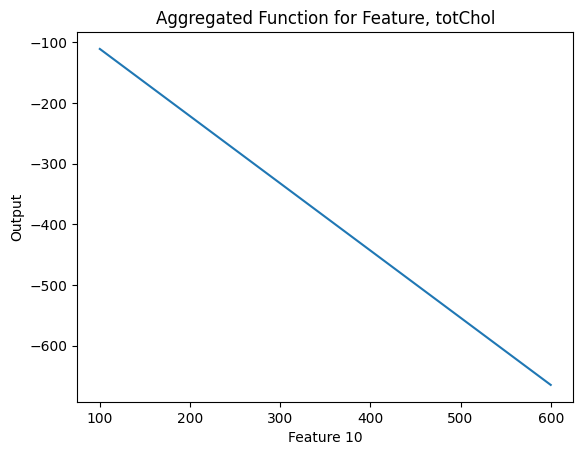

4/4 [==============================] - 0s 4ms/step


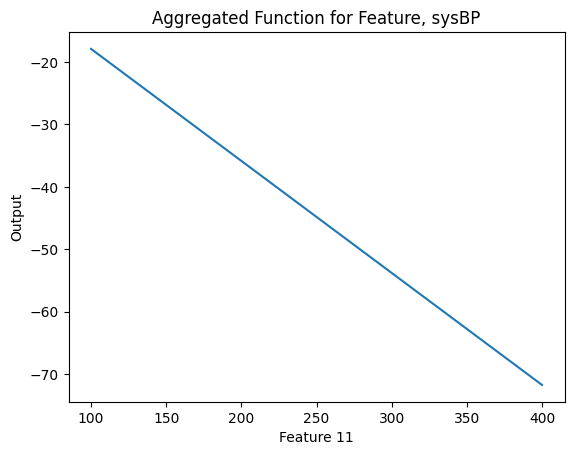

4/4 [==============================] - 0s 4ms/step


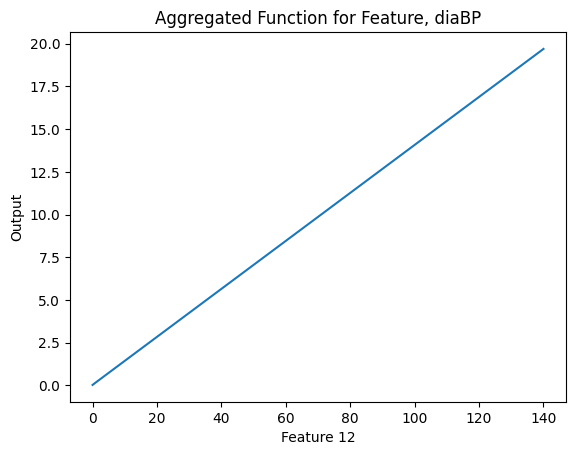

4/4 [==============================] - 0s 3ms/step


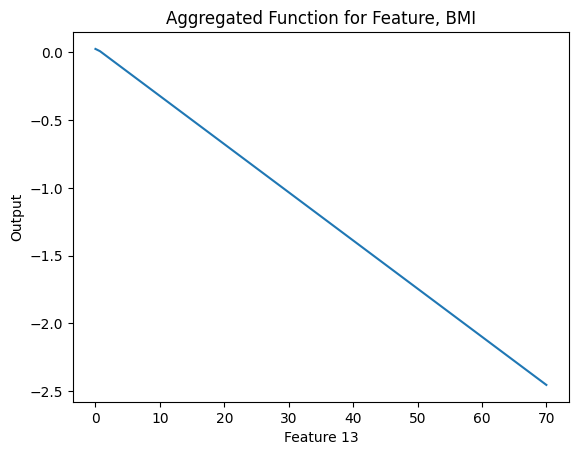

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Load the dataset
df = pd.read_csv('/content/heart.csv')

# Splitting the dataset for 3 clients
client_datasets = []
chunk_size = int(len(df) / 10)

# Initialize a dictionary to hold the data for each client
clients_data = {}
weights = []
# Split the data

for i in range(10):
    # Ensure that the last client gets the remainder of the data
  if i == 9:
      clients_data[f'client_{i+1}'] = df[i*chunk_size:]
  else:
      clients_data[f'client_{i+1}'] = df[i*chunk_size:(i+1)*chunk_size]

for client_id, data in clients_data.items():
  train_data, test_data = train_test_split(data, test_size=0.2)  # 80-20 split
  X = train_data.drop('target', axis=1)
  y = test_data['target']

  # Standardize the features
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X)
  client_data, df = train_test_split(df, test_size=0.67)
  import tensorflow as tf
  from tensorflow.keras.layers import Input, Dense
  from tensorflow.keras.models import Model

  class NAM(tf.keras.Model):
      def __init__(self, feature_shapes, output_units=1, num_hidden_units=10):
          super(NAM, self).__init__()
          self.feature_nets = []
          for shape in feature_shapes:
              input_layer = Input(shape=(shape,))
              hidden_layer = Dense(num_hidden_units, activation='relu')(input_layer)
              output_layer = Dense(output_units)(hidden_layer)
              self.feature_nets.append(Model(inputs=input_layer, outputs=output_layer))

      def call(self, inputs):
          feature_outputs = [net(input) for net, input in zip(self.feature_nets, inputs)]
          return tf.reduce_sum(tf.concat(feature_outputs, axis=1), axis=1, keepdims=True)
  models = []
  num_features = len(df.columns) - 1  # Assuming the last column is the target
  X = client_data.drop('target', axis=1).values # Replace 'target' with the actual target column name
  y = client_data['target'].values # Replace 'target' with the actual target column name
  model = NAM([1] * num_features)
  model.compile(optimizer='adam', loss='mean_squared_error')

  # Train the model - X needs to be a list of NumPy arrays
  model.fit([X[:, i].reshape(-1, 1) for i in range(num_features)], y, epochs=20, batch_size=32)
  models.append(model)
  weights.append(model.get_weights())

  ### Step 4: Aggregate and Plot Feature Functions

  # After training models on each client, aggregate the feature functions and plot them.

  # ```python
  import numpy as np
  import matplotlib.pyplot as plt
average_weights = [np.mean([model_weights[i] for model_weights in weights], axis=0) for i in range(len(weights[0]))]

# Step 5: Create and Set the Global Model
global_model = NAM([1] * num_features)
global_model.compile(optimizer='adam', loss='mean_squared_error')
global_model.set_weights(average_weights)








#plots should be plotted after the construction of global model
def aggregate_and_plot_feature_functions(models, num_features, num_points=100):
    avg_predictions = [np.zeros(num_points) for _ in range(num_features)]

    for i in range(num_features):
        if i == 0:
          feature_values = np.linspace(0, 1, 100)  # Adjust the range according to your feature scales
        elif  i == 1:
          feature_values = np.linspace(32, 70, 100) # Adjust the range according to your feature scales
        elif  i == 2:
          feature_values = np.linspace(1, 4, 100)  # Adjust the range according to your feature scales
        elif  i == 3:
          feature_values = np.linspace(0, 1, 100)  # Adjust the range according to your feature scales
        elif  i == 4:
          feature_values = np.linspace(0, 70, 100) # Adjust the range according to your feature scales
        elif  i == 5:
          feature_values = np.linspace(0, 1, 100) # Adjust the range according to your feature scales
        elif  i == 6:
          feature_values = np.linspace(0, 1, 100)  # Adjust the range according to your feature scales
        elif  i == 7:
          feature_values = np.linspace(0, 1, 100)  # Adjust the range according to your feature scales
        elif  i == 8:
          feature_values = np.linspace(0, 1, 100)  # Adjust the range according to your feature scales
        elif  i == 9:
          feature_values = np.linspace(100, 600, 100) # Adjust the range according to your feature scales
        elif  i == 10:
          feature_values = np.linspace(100, 400, 100)# Adjust the range according to your feature scales
        elif  i == 11:
          feature_values = np.linspace(0, 140, 100) # Adjust the range according to your feature scales
        else:
          feature_values = np.linspace(0, 70, 100)# Adjust the range according to your feature scales

        for model in models:
            inputs = [np.zeros((num_points, 1)) for _ in range(num_features)]
            inputs[i] = feature_values.reshape(-1, 1)
            predictions = model.feature_nets[i].predict(inputs[i])
            avg_predictions[i] += predictions.ravel()

        avg_predictions[i] /= len(models)

        plt.plot(feature_values, avg_predictions[i], label=f'Feature {i+1}')
        plt.xlabel(f'Feature {i+1}')
        plt.ylabel('Output')
        if i == 0:
          plt.title(f'Aggregated Function for Feature, Male')
        elif  i == 1:
          plt.title(f'Aggregated Function for Feature, Age')
        elif  i == 2:
          plt.title(f'Aggregated Function for Feature, Education')
        elif  i == 3:
          plt.title(f'Aggregated Function for Feature, Currentsmoker')
        elif  i == 4:
          plt.title(f'Aggregated Function for Feature, cigsPerDay')
        elif  i == 5:
          plt.title(f'Aggregated Function for Feature, BPMeds')
        elif  i == 6:
          plt.title(f'Aggregated Function for Feature, prevalentStroke')
        elif  i == 7:
          plt.title(f'Aggregated Function for Feature, prevalentHyp')
        elif  i == 8:
          plt.title(f'Aggregated Function for Feature, diabetes')
        elif  i == 9:
          plt.title(f'Aggregated Function for Feature, totChol')
        elif  i == 10:
          plt.title(f'Aggregated Function for Feature, sysBP')
        elif  i == 11:
          plt.title(f'Aggregated Function for Feature, diaBP')
        elif  i == 12:
          plt.title(f'Aggregated Function for Feature, BMI')
        elif  i == 13:
          plt.title(f'Aggregated Function for Feature, heartRate')
        elif  i == 14:
          plt.title(f'Aggregated Function for Feature, glucose')

        plt.show()

aggregate_and_plot_feature_functions(models, num_features)




In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
# Load the dataset
df = pd.read_csv('/content/heart.csv')

# Splitting the dataset for 3 clients
# client_datasets = []
chunk_size = int(len(df) / 10)
# Initialize a dictionary to hold the data for each client
clients_data = {}
weights = []
# Split the data
for i in range(10):
    # Ensure that the last client gets the remainder of the data
  if i == 9:
      clients_data[f'client_{i+1}'] = df[i*chunk_size:]
  else:
      clients_data[f'client_{i+1}'] = df[i*chunk_size:(i+1)*chunk_size]

feature_names= []
for column in df.columns:
  feature_names.append(column)

print(feature_names)
feature_names_final = [s.capitalize() for s in feature_names]

print(feature_names_final)


Training client 1/4
Training client 2/4
Training client 3/4
Training client 4/4
Training client 1/4
Training client 2/4
Training client 3/4
Training client 4/4
Training client 1/4
Training client 2/4
Training client 3/4
Training client 4/4
Training client 1/4
Training client 2/4
Training client 3/4
Training client 4/4
Training client 1/4
Training client 2/4
Training client 3/4
Training client 4/4
Training client 1/4
Training client 2/4
Training client 3/4
Training client 4/4
Training client 1/4
Training client 2/4
Training client 3/4
Training client 4/4
Training client 1/4
Training client 2/4
Training client 3/4
Training client 4/4
Training client 1/4
Training client 2/4
Training client 3/4
Training client 4/4
Training client 1/4
Training client 2/4
Training client 3/4
Training client 4/4
Training client 1/4
Training client 2/4
Training client 3/4
Training client 4/4
Training client 1/4
Training client 2/4
Training client 3/4
Training client 4/4
Training client 1/4
Training client 2/4


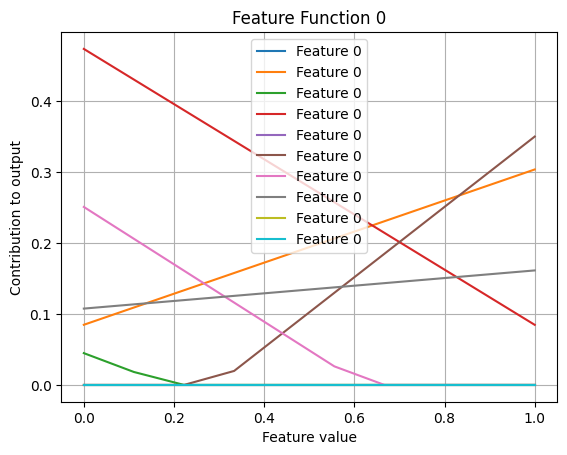

tensor([[32.0000],
        [36.2222],
        [40.4444],
        [44.6667],
        [48.8889],
        [53.1111],
        [57.3333],
        [61.5556],
        [65.7778],
        [70.0000]])
tensor([[ 0.0000,  4.4141,  0.0000,  8.7499,  0.0000, 12.1185,  0.0000, 11.7411,
         14.9349,  0.0000],
        [ 0.0000,  5.0305,  0.0000,  9.9629,  0.0000, 13.7955,  0.0000, 13.3120,
         16.8519,  0.0000],
        [ 0.0000,  5.6470,  0.0000, 11.1758,  0.0000, 15.4724,  0.0000, 14.8829,
         18.7689,  0.0000],
        [ 0.0000,  6.2635,  0.0000, 12.3888,  0.0000, 17.1494,  0.0000, 16.4538,
         20.6859,  0.0000],
        [ 0.0000,  6.8800,  0.0000, 13.6017,  0.0000, 18.8263,  0.0000, 18.0247,
         22.6029,  0.0000],
        [ 0.0000,  7.4965,  0.0000, 14.8147,  0.0000, 20.5032,  0.0000, 19.5957,
         24.5198,  0.0000],
        [ 0.0000,  8.1130,  0.0000, 16.0276,  0.0000, 22.1802,  0.0000, 21.1666,
         26.4368,  0.0000],
        [ 0.0000,  8.7295,  0.0000, 17.2405,  

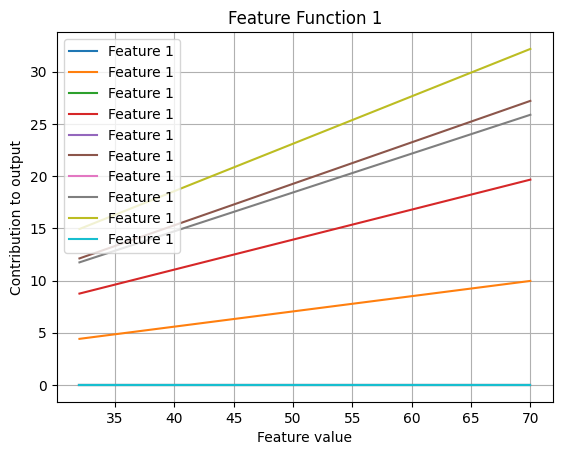

tensor([[1.0000],
        [1.3333],
        [1.6667],
        [2.0000],
        [2.3333],
        [2.6667],
        [3.0000],
        [3.3333],
        [3.6667],
        [4.0000]])
tensor([[0.0000, 0.2067, 0.0000, 0.0980, 0.2967, 0.6457, 0.0000, 0.3111, 0.0000,
         0.1556],
        [0.0000, 0.2411, 0.0000, 0.1770, 0.3272, 0.7175, 0.0000, 0.3550, 0.0000,
         0.1403],
        [0.0000, 0.2755, 0.0000, 0.2560, 0.3577, 0.7894, 0.0000, 0.3989, 0.0000,
         0.1250],
        [0.0000, 0.3099, 0.0000, 0.3351, 0.3882, 0.8612, 0.0000, 0.4428, 0.0000,
         0.1097],
        [0.0000, 0.3443, 0.0000, 0.4141, 0.4186, 0.9330, 0.0000, 0.4867, 0.0000,
         0.0944],
        [0.0191, 0.3787, 0.0000, 0.4931, 0.4491, 1.0048, 0.0000, 0.5306, 0.0000,
         0.0792],
        [0.0627, 0.4130, 0.0000, 0.5721, 0.4796, 1.0767, 0.0000, 0.5745, 0.0000,
         0.0639],
        [0.1063, 0.4474, 0.0000, 0.6511, 0.5101, 1.1485, 0.0000, 0.6184, 0.0000,
         0.0486],
        [0.1498, 0.4818, 0.

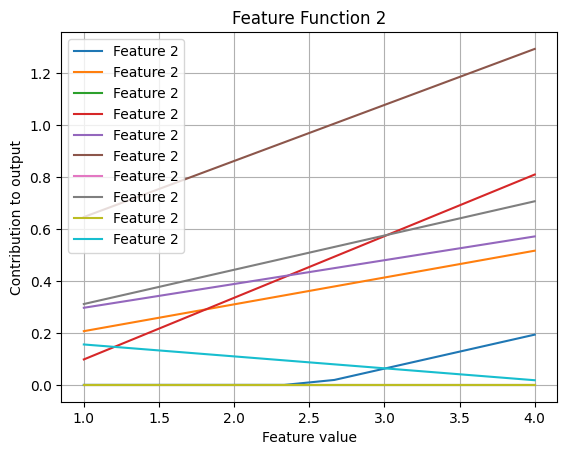

tensor([[0.0000],
        [0.1111],
        [0.2222],
        [0.3333],
        [0.4444],
        [0.5556],
        [0.6667],
        [0.7778],
        [0.8889],
        [1.0000]])
tensor([[0.0000, 0.0000, 0.2937, 0.0000, 0.1182, 0.2024, 0.6553, 0.2963, 0.3098,
         0.0047],
        [0.0000, 0.0000, 0.2638, 0.0000, 0.1071, 0.1782, 0.6702, 0.3211, 0.2617,
         0.0780],
        [0.0000, 0.0000, 0.2339, 0.0000, 0.0960, 0.1540, 0.6851, 0.3460, 0.2136,
         0.1513],
        [0.0000, 0.0000, 0.2040, 0.0000, 0.0849, 0.1298, 0.6999, 0.3709, 0.1656,
         0.2246],
        [0.0000, 0.0000, 0.1741, 0.0000, 0.0738, 0.1057, 0.7148, 0.3957, 0.1175,
         0.2979],
        [0.0000, 0.0000, 0.1442, 0.0000, 0.0627, 0.0815, 0.7297, 0.4206, 0.0694,
         0.3712],
        [0.0000, 0.0000, 0.1143, 0.0000, 0.0516, 0.0573, 0.7446, 0.4455, 0.0214,
         0.4445],
        [0.0000, 0.0000, 0.0844, 0.0000, 0.0405, 0.0331, 0.7594, 0.4703, 0.0000,
         0.5178],
        [0.0000, 0.0000, 0.

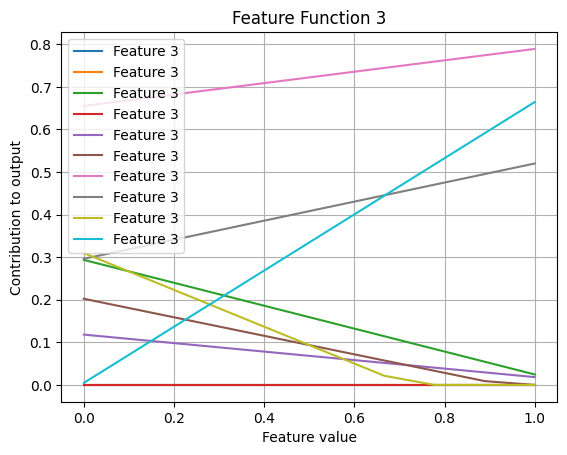

tensor([[ 0.0000],
        [ 7.7778],
        [15.5556],
        [23.3333],
        [31.1111],
        [38.8889],
        [46.6667],
        [54.4444],
        [62.2222],
        [70.0000]])
tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 2.9753e-02, 7.5345e-02, 2.1482e-02,
         0.0000e+00, 1.6951e-01, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 2.9679e+00, 0.0000e+00, 1.0942e+00,
         0.0000e+00, 4.2603e-01, 0.0000e+00, 3.5878e-01],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 5.9060e+00, 0.0000e+00, 2.1668e+00,
         0.0000e+00, 6.8255e-01, 0.0000e+00, 8.2191e-01],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 8.8441e+00, 0.0000e+00, 3.2395e+00,
         0.0000e+00, 9.3907e-01, 0.0000e+00, 1.2850e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 1.1782e+01, 0.0000e+00, 4.3122e+00,
         0.0000e+00, 1.1956e+00, 0.0000e+00, 1.7482e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 1.4720e+01, 0.0000e+00, 5.3849e+00,
         0.0000e+00, 1.4521e+00, 

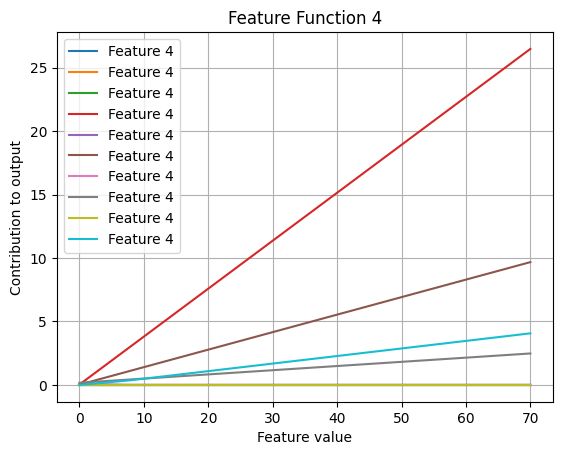

tensor([[0.0000],
        [0.1111],
        [0.2222],
        [0.3333],
        [0.4444],
        [0.5556],
        [0.6667],
        [0.7778],
        [0.8889],
        [1.0000]])
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.3689, 0.0000, 0.0000, 0.0000,
         0.6547],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.3217, 0.0000, 0.0000, 0.0000,
         0.7181],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2745, 0.0478, 0.0000, 0.0000,
         0.7816],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2273, 0.1008, 0.0000, 0.0000,
         0.8450],
        [0.0000, 0.0615, 0.0000, 0.0000, 0.0000, 0.1801, 0.1539, 0.0000, 0.0000,
         0.9085],
        [0.0000, 0.1353, 0.0000, 0.0000, 0.0000, 0.1328, 0.2069, 0.0000, 0.0000,
         0.9719],
        [0.0000, 0.2090, 0.0000, 0.0000, 0.0000, 0.0856, 0.2599, 0.0000, 0.0000,
         1.0353],
        [0.0000, 0.2828, 0.0069, 0.0000, 0.0000, 0.0384, 0.3129, 0.0000, 0.0000,
         1.0988],
        [0.0000, 0.3566, 0.

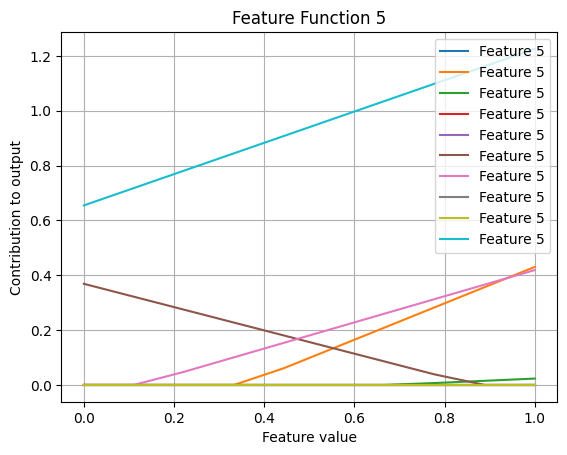

tensor([[0.0000],
        [0.1111],
        [0.2222],
        [0.3333],
        [0.4444],
        [0.5556],
        [0.6667],
        [0.7778],
        [0.8889],
        [1.0000]])
tensor([[0.2011, 0.1417, 0.0781, 0.1790, 0.6518, 0.2482, 0.0000, 0.0625, 0.2086,
         0.6317],
        [0.2091, 0.1552, 0.0153, 0.2533, 0.6419, 0.2489, 0.0000, 0.0000, 0.2643,
         0.7034],
        [0.2172, 0.1686, 0.0000, 0.3276, 0.6321, 0.2495, 0.0000, 0.0000, 0.3200,
         0.7751],
        [0.2253, 0.1820, 0.0000, 0.4019, 0.6223, 0.2502, 0.0000, 0.0000, 0.3757,
         0.8468],
        [0.2334, 0.1955, 0.0000, 0.4762, 0.6125, 0.2508, 0.0000, 0.0000, 0.4314,
         0.9185],
        [0.2415, 0.2089, 0.0000, 0.5505, 0.6027, 0.2515, 0.0000, 0.0000, 0.4872,
         0.9903],
        [0.2496, 0.2224, 0.0000, 0.6248, 0.5929, 0.2521, 0.0000, 0.0000, 0.5429,
         1.0620],
        [0.2577, 0.2358, 0.0000, 0.6990, 0.5831, 0.2528, 0.0000, 0.0000, 0.5986,
         1.1337],
        [0.2657, 0.2493, 0.

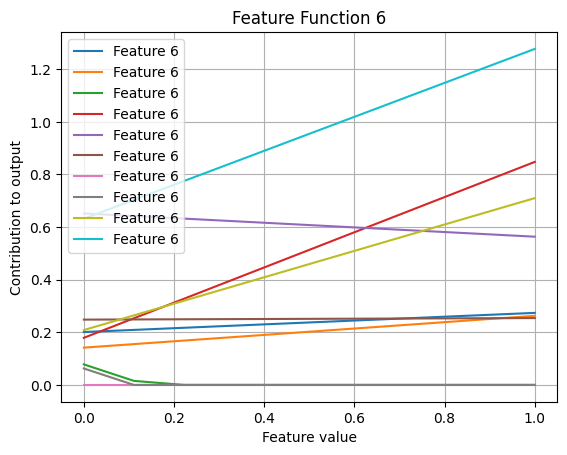

tensor([[0.0000],
        [0.1111],
        [0.2222],
        [0.3333],
        [0.4444],
        [0.5556],
        [0.6667],
        [0.7778],
        [0.8889],
        [1.0000]])
tensor([[7.4980e-03, 4.3520e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 3.6700e-01, 0.0000e+00],
        [6.3623e-05, 4.6506e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 3.4742e-01, 0.0000e+00],
        [0.0000e+00, 4.9493e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 3.2785e-01, 0.0000e+00],
        [0.0000e+00, 5.2479e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 3.0828e-01, 0.0000e+00],
        [0.0000e+00, 5.5466e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 2.8871e-01, 0.0000e+00],
        [0.0000e+00, 5.8452e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 2.6913e-01

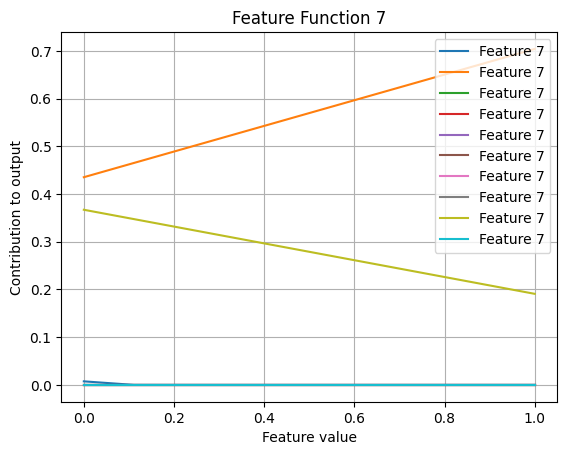

tensor([[0.0000],
        [0.1111],
        [0.2222],
        [0.3333],
        [0.4444],
        [0.5556],
        [0.6667],
        [0.7778],
        [0.8889],
        [1.0000]])
tensor([[0.0000, 0.0000, 0.2578, 0.0000, 0.0814, 0.0000, 0.0545, 0.0000, 0.0283,
         0.0000],
        [0.0000, 0.0000, 0.1928, 0.0000, 0.1296, 0.0000, 0.1012, 0.0000, 0.0089,
         0.0000],
        [0.0000, 0.0000, 0.1278, 0.0000, 0.1777, 0.0000, 0.1479, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0628, 0.0000, 0.2259, 0.0000, 0.1946, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.2740, 0.0000, 0.2413, 0.0000, 0.0000,
         0.0000],
        [0.0073, 0.0000, 0.0000, 0.0000, 0.3221, 0.0000, 0.2880, 0.0000, 0.0000,
         0.0000],
        [0.0328, 0.0000, 0.0000, 0.0000, 0.3703, 0.0000, 0.3347, 0.0000, 0.0000,
         0.0000],
        [0.0583, 0.0000, 0.0000, 0.0178, 0.4184, 0.0000, 0.3814, 0.0000, 0.0000,
         0.0000],
        [0.0838, 0.0000, 0.

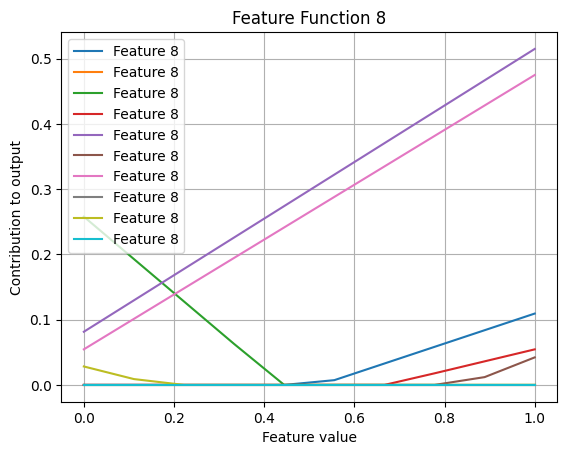

tensor([[100.0000],
        [155.5556],
        [211.1111],
        [266.6667],
        [322.2222],
        [377.7778],
        [433.3333],
        [488.8889],
        [544.4445],
        [600.0000]])
tensor([[ 17.0284,   0.0000,   0.0000,   0.0000,  29.2595,   0.0000,   0.0000,
           0.0000,   0.0000,   0.0000],
        [ 26.5668,   0.0000,   0.0000,   0.0000,  45.4079,   0.0000,   0.0000,
           0.0000,   0.0000,   0.0000],
        [ 36.1052,   0.0000,   0.0000,   0.0000,  61.5563,   0.0000,   0.0000,
           0.0000,   0.0000,   0.0000],
        [ 45.6435,   0.0000,   0.0000,   0.0000,  77.7046,   0.0000,   0.0000,
           0.0000,   0.0000,   0.0000],
        [ 55.1819,   0.0000,   0.0000,   0.0000,  93.8530,   0.0000,   0.0000,
           0.0000,   0.0000,   0.0000],
        [ 64.7203,   0.0000,   0.0000,   0.0000, 110.0013,   0.0000,   0.0000,
           0.0000,   0.0000,   0.0000],
        [ 74.2587,   0.0000,   0.0000,   0.0000, 126.1497,   0.0000,   0.0000,
      

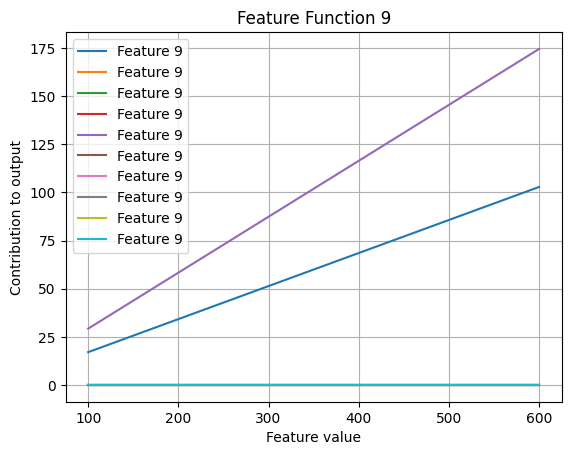

tensor([[100.0000],
        [133.3333],
        [166.6667],
        [200.0000],
        [233.3333],
        [266.6667],
        [300.0000],
        [333.3333],
        [366.6667],
        [400.0000]])
tensor([[  2.5023,  13.4381,   0.0000,  17.2500,  36.9865,  21.2198,  13.9207,
           0.0000,  13.8031,   0.0000],
        [  3.2360,  17.8208,   0.0000,  22.9501,  49.3454,  28.2898,  18.6048,
           0.0000,  18.2091,   0.0000],
        [  3.9696,  22.2035,   0.0000,  28.6503,  61.7044,  35.3598,  23.2889,
           0.0000,  22.6152,   0.0000],
        [  4.7032,  26.5862,   0.0000,  34.3505,  74.0634,  42.4298,  27.9730,
           0.0000,  27.0212,   0.0000],
        [  5.4368,  30.9689,   0.0000,  40.0506,  86.4224,  49.4998,  32.6571,
           0.0000,  31.4272,   0.0000],
        [  6.1704,  35.3516,   0.0000,  45.7508,  98.7814,  56.5698,  37.3412,
           0.0000,  35.8332,   0.0000],
        [  6.9040,  39.7343,   0.0000,  51.4510, 111.1404,  63.6398,  42.0253,
      

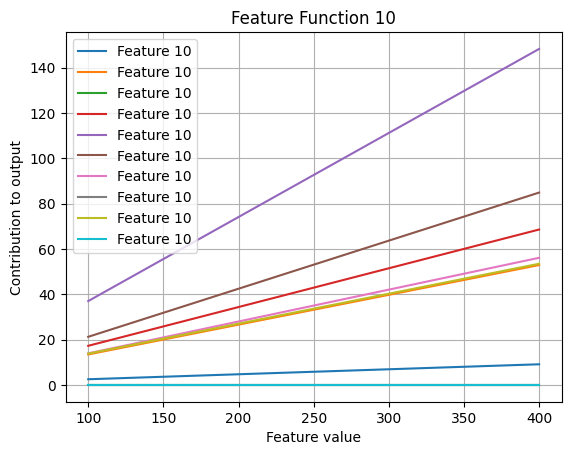

tensor([[  0.0000],
        [ 15.5556],
        [ 31.1111],
        [ 46.6667],
        [ 62.2222],
        [ 77.7778],
        [ 93.3333],
        [108.8889],
        [124.4444],
        [140.0000]])
tensor([[5.6455e-01, 0.0000e+00, 1.7352e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         8.8267e-02, 4.2514e-03, 0.0000e+00, 1.5719e-02],
        [1.8118e+00, 0.0000e+00, 0.0000e+00, 1.7758e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 6.1367e+00],
        [3.0590e+00, 0.0000e+00, 0.0000e+00, 3.6304e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 1.2258e+01],
        [4.3062e+00, 0.0000e+00, 0.0000e+00, 5.4850e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 1.8379e+01],
        [5.5534e+00, 0.0000e+00, 0.0000e+00, 7.3397e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 2.4500e+01],
        [6.8006e+00, 0.0000e+00, 0.0000e+00, 9.1943e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.

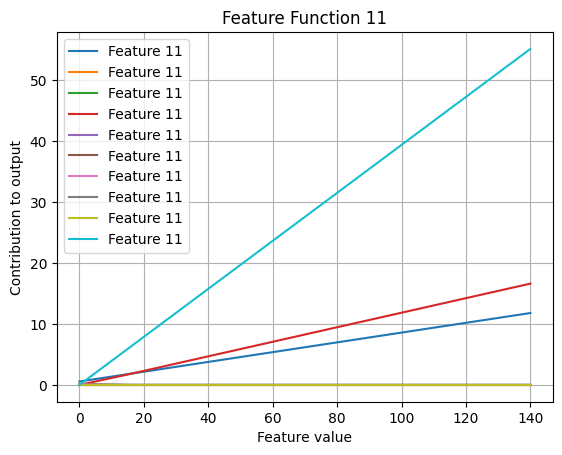

tensor([[ 0.0000],
        [ 7.7778],
        [15.5556],
        [23.3333],
        [31.1111],
        [38.8889],
        [46.6667],
        [54.4444],
        [62.2222],
        [70.0000]])
tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 3.8457e-01, 0.0000e+00, 1.1971e-01,
         0.0000e+00, 7.5379e-02, 4.9813e-01, 1.2480e-02],
        [4.3456e+00, 2.9572e+00, 0.0000e+00, 8.0856e-01, 0.0000e+00, 1.3503e+00,
         8.7750e-01, 5.2455e-01, 0.0000e+00, 0.0000e+00],
        [8.8606e+00, 6.3245e+00, 0.0000e+00, 1.2326e+00, 0.0000e+00, 2.5810e+00,
         2.3079e+00, 9.7372e-01, 0.0000e+00, 0.0000e+00],
        [1.3376e+01, 9.6918e+00, 0.0000e+00, 1.6566e+00, 0.0000e+00, 3.8116e+00,
         3.7383e+00, 1.4229e+00, 0.0000e+00, 0.0000e+00],
        [1.7891e+01, 1.3059e+01, 0.0000e+00, 2.0806e+00, 0.0000e+00, 5.0422e+00,
         5.1687e+00, 1.8721e+00, 0.0000e+00, 0.0000e+00],
        [2.2406e+01, 1.6426e+01, 0.0000e+00, 2.5045e+00, 0.0000e+00, 6.2728e+00,
         6.5991e+00, 2.3212e+00, 

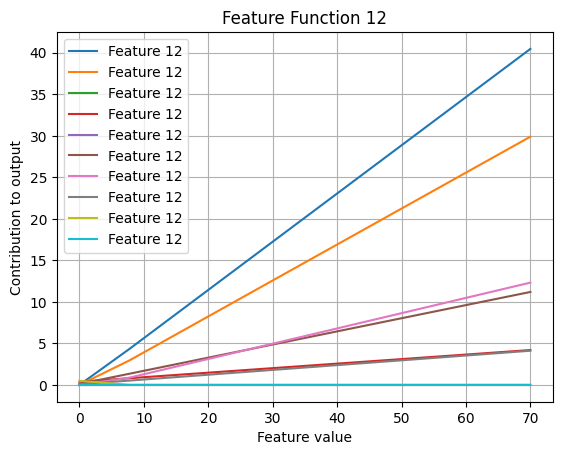

In [12]:
import numpy as np
import pandas as pd
import torch
from torch import nn, optim
from sklearn.model_selection import train_test_split

# Define the Neural Additive Model (NAM)
class NAM(nn.Module):
    def __init__(self, num_features):
        super(NAM, self).__init__()
        self.feature_extractors = nn.ModuleList([nn.Sequential(nn.Linear(1, 10), nn.ReLU(), nn.Linear(10, 1)) for _ in range(num_features)])
        self.output_layer = nn.Linear(num_features, 1)

    def forward(self, x):
        features = [feature_extractor(x[:, i:i+1]) for i, feature_extractor in enumerate(self.feature_extractors)]
        features = torch.cat(features, dim=1)
        output = self.output_layer(features)
        return output

# Function to split data and create dataloaders
def create_dataloaders(X, y, batch_size=32):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    train_data = torch.utils.data.TensorDataset(torch.FloatTensor(X_train), torch.FloatTensor(y_train))
    test_data = torch.utils.data.TensorDataset(torch.FloatTensor(X_test), torch.FloatTensor(y_test))
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)
    return train_loader, test_loader

# Load and preprocess data
df = pd.read_csv('/content/heart.csv')
X = df.drop('target', axis=1).values
y = df['target'].values.reshape(-1, 1)  # Ensure y is a 2D array

# Create clients datasets
num_clients = 4
client_data_indices = np.array_split(np.arange(len(X)), num_clients)
client_dataloaders = [create_dataloaders(X[indices], y[indices]) for indices in client_data_indices]

# Train NAM on each client and perform federated averaging
global_feature_functions = [None] * X.shape[1]  # Placeholder for global feature functions
num_epochs = 20
num_features = X.shape[1]

for epoch in range(num_epochs):
    local_models = []
    for client_id, (train_loader, test_loader) in enumerate(client_dataloaders):
        print(f"Training client {client_id+1}/{num_clients}")
        model = NAM(num_features)
        criterion = nn.BCEWithLogitsLoss()
        optimizer = optim.Adam(model.parameters(), lr=0.01)

        # Train model
        model.train()
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            loss.backward()
            optimizer.step()

        local_models.append(model)

    # Federated averaging of feature functions
    with torch.no_grad():
        for feature_idx in range(num_features):
            average_weight = sum(local_model.feature_extractors[feature_idx].state_dict()['0.weight'] for local_model in local_models) / num_clients
            average_bias = sum(local_model.feature_extractors[feature_idx].state_dict()['0.bias'] for local_model in local_models) / num_clients
            if epoch == num_epochs - 1:  # Update global feature functions after last epoch
                global_feature_functions[feature_idx] = (average_weight, average_bias)

# Display the final averaged feature functions for each feature across clients
for feature_idx, (avg_weight, avg_bias) in enumerate(global_feature_functions):
    print(f"Feature {feature_idx}: Weight = {avg_weight.numpy()}, Bias = {avg_bias.numpy()}")
import matplotlib.pyplot as plt

# Define a function to plot each feature function
def plot_feature_function(feature_idx, weight, bias):
    # Create a range of input values
    if feature_idx == 0:
      x_values = torch.linspace(0, 1, 10).unsqueeze(1)  # Adjust the range according to your feature scales
    elif  feature_idx == 1:
      x_values = torch.linspace(32, 70, 10).unsqueeze(1)  # Adjust the range according to your feature scales
    elif  feature_idx == 2:
      x_values = torch.linspace(1, 4, 10).unsqueeze(1)  # Adjust the range according to your feature scales
    elif  feature_idx == 3:
      x_values = torch.linspace(0, 1, 10).unsqueeze(1)  # Adjust the range according to your feature scales
    elif  feature_idx == 4:
      x_values = torch.linspace(0, 70, 10).unsqueeze(1)  # Adjust the range according to your feature scales
    elif  feature_idx == 5:
      x_values = torch.linspace(0, 1, 10).unsqueeze(1)  # Adjust the range according to your feature scales
    elif  feature_idx == 6:
      x_values = torch.linspace(0, 1, 10).unsqueeze(1)  # Adjust the range according to your feature scales
    elif  feature_idx == 7:
      x_values = torch.linspace(0, 1, 10).unsqueeze(1)  # Adjust the range according to your feature scales
    elif  feature_idx == 8:
      x_values = torch.linspace(0, 1, 10).unsqueeze(1)  # Adjust the range according to your feature scales
    elif  feature_idx == 9:
      x_values = torch.linspace(100, 600, 10).unsqueeze(1)  # Adjust the range according to your feature scales
    elif  feature_idx == 10:
      x_values = torch.linspace(100, 400, 10).unsqueeze(1)  # Adjust the range according to your feature scales
    elif  feature_idx == 11:
      x_values = torch.linspace(0, 140, 10).unsqueeze(1)  # Adjust the range according to your feature scales
    else:
      x_values = torch.linspace(0, 70, 10).unsqueeze(1)  # Adjust the range according to your feature scales

    # Apply the feature function (a simple neural net layer in this case)
    y_values = torch.relu(x_values @ weight.T + bias)
    print(x_values)
    print(y_values)
    # Plotting
    plt.figure()
    plt.plot(x_values.numpy(), y_values.detach().numpy(), label=f'Feature {feature_idx}')
    plt.title(f'Feature Function {feature_idx}')
    plt.xlabel('Feature value')
    plt.ylabel('Contribution to output')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot each feature function
for feature_idx, (avg_weight, avg_bias) in enumerate(global_feature_functions):
    plot_feature_function(feature_idx, avg_weight, avg_bias)
